# Using Lifelines Package

**NOTE:** WeibullFitter uses MLE to estimate the Weibull parameters

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from lifelines import WeibullFitter
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv('Weibull_Suspensions.csv')

In [5]:
df

,VIN,DTF,STATUS
0,6,10,SUSPENDED
1,1,30,FAILED
2,7,45,SUSPENDED
3,2,49,FAILED
4,3,82,FAILED
5,4,90,FAILED
6,5,96,FAILED
7,8,100,SUSPENDED


#### In order to use Lifelines, it expects the labeling of failed units to be assigned a value of 1 and suspensions assigned a value of zero/0

In [6]:
df['STATUS'] = df['STATUS'].replace({'FAILED': 1, 'SUSPENDED': 0})

In [7]:
df

,VIN,DTF,STATUS
0,6,10,0
1,1,30,1
2,7,45,0
3,2,49,1
4,3,82,1
5,4,90,1
6,5,96,1
7,8,100,0


In [8]:
T = df['DTF']
E = df['STATUS']

In [9]:
weibf = WeibullFitter()

In [10]:
weibf.fit(T, event_observed=E, timeline=range(0, 200))

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 8 total observations, 3 right-censored observations>

In [14]:
weibf.print_summary()

<lifelines.WeibullFitter:"Weibull_estimate", fitted with 8 total observations, 3 right-censored observations>
   number of observations = 8
number of events observed = 5
           log-likelihood = -25.13
               hypothesis = lambda_ != 1, rho_ != 1

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  87.96      13.04            62.40           113.51
rho_      3.02       1.15             0.77             5.27

          cmp to    z      p   -log2(p)
lambda_     1.00 6.67 <0.005      35.17
rho_        1.00 1.76   0.08       3.66
---
AIC = 54.26

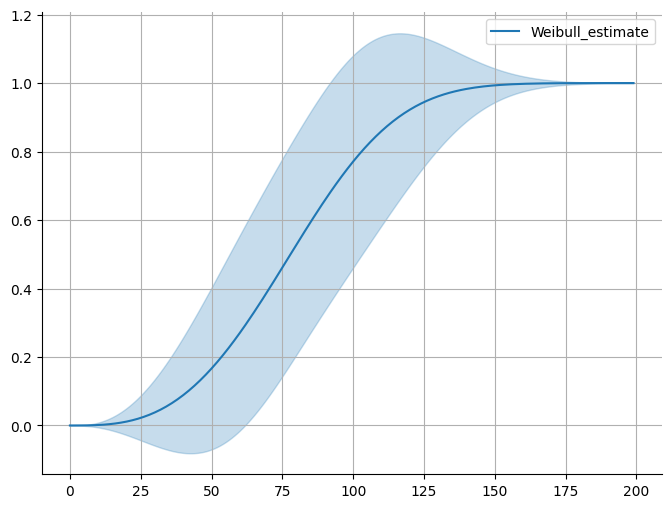

In [11]:
fig, ax = plt.subplots(figsize=(8,6))
ax.spines[['right', 'top']].set_visible(False)

weibf.plot_cumulative_density()
plt.grid()